<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Source" data-toc-modified-id="Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Source</a></span></li><li><span><a href="#Get-the-Data" data-toc-modified-id="Get-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Categorical columns</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Source

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

# Get the Data

In [2]:
shoppers = pd.read_csv(r'C:\Users\Tiago McDonald\Downloads\online_shoppers_intention.csv')

# EDA

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

In [3]:
shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The dataset consists of 10 numerical and 8 categorical attributes.

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"**

They represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

**"Bounce Rates", "Exit Rates" and "Page Values"**

They represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

**"Special Day"**

Indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

There are no missing values. The columns **Month, OperatingSystems, Browser, Region, TrafficType and VisitorType** will need to be converted to dummies

In [5]:
shoppers_cleaned = shoppers.copy()

In [6]:
# Option: Calculate duration per page por each type of page
shoppers_cleaned.insert(loc=6, column='Product_TPP', value=np.where(shoppers.ProductRelated_Duration==0,0, shoppers.ProductRelated_Duration / shoppers.ProductRelated).round(2))
shoppers_cleaned.insert(loc=4, column='Informational_TPP', value=np.where(shoppers.Informational_Duration==0,0, shoppers.Informational_Duration / shoppers.Informational).round(2))
shoppers_cleaned.insert(loc=2, column='Administrative_TPP', value=np.where(shoppers.Administrative_Duration==0,0, shoppers.Administrative_Duration / shoppers.Administrative).round(2))

In [7]:
shoppers_cleaned

,Administrative,Administrative_Duration,Administrative_TPP,Informational,Informational_Duration,Informational_TPP,ProductRelated,ProductRelated_Duration,Product_TPP,BounceRates,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.00,0,0.0,0.0,1,0.000000,0.00,0.200000,...,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.00,0,0.0,0.0,2,64.000000,32.00,0.000000,...,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.00,0,0.0,0.0,1,0.000000,0.00,0.200000,...,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.00,0,0.0,0.0,2,2.666667,1.33,0.050000,...,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.00,0,0.0,0.0,10,627.500000,62.75,0.020000,...,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,48.33,0,0.0,0.0,53,1783.791667,33.66,0.007143,...,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0.00,0,0.0,0.0,5,465.750000,93.15,0.000000,...,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0.00,0,0.0,0.0,6,184.250000,30.71,0.083333,...,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,18.75,0,0.0,0.0,15,346.000000,23.07,0.000000,...,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


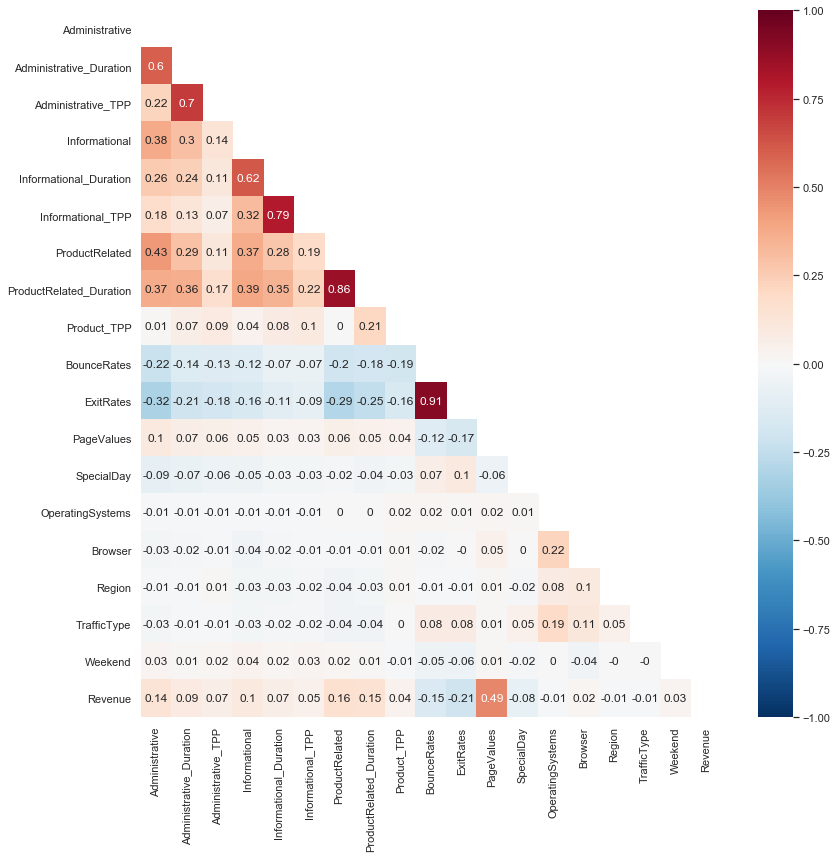

In [8]:
# Check for correlation
corr = shoppers_cleaned.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

In [9]:
# Drop the old columns, including Exit Rate since it has high correlation with Bounce Rate
shoppers_cleaned.drop(['Administrative'
                       ,'Administrative_Duration'
                       ,'Informational'
                       ,'Informational_Duration'
                       ,'ProductRelated'
                       ,'ProductRelated_Duration'
                       ,'ExitRates'
                      ]
                     , axis=1, inplace=True)

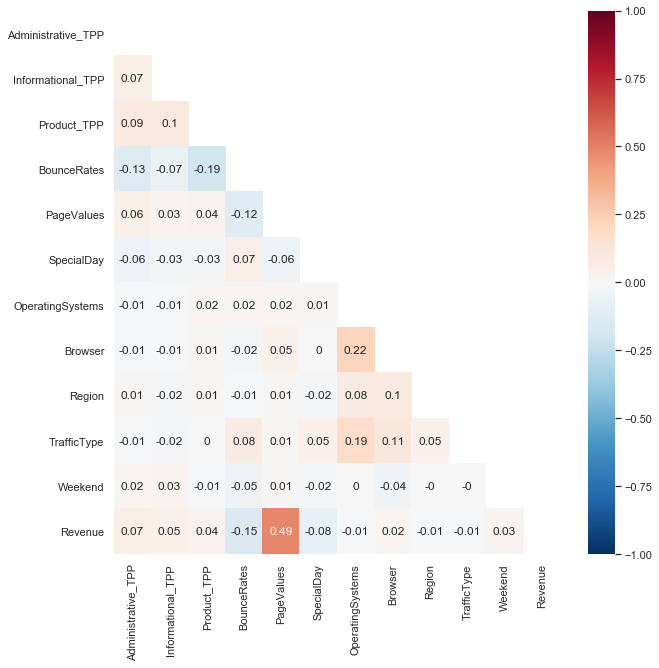

In [10]:
# Check again for correlation
corr = shoppers_cleaned.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap_2nd.png')

## Outliers

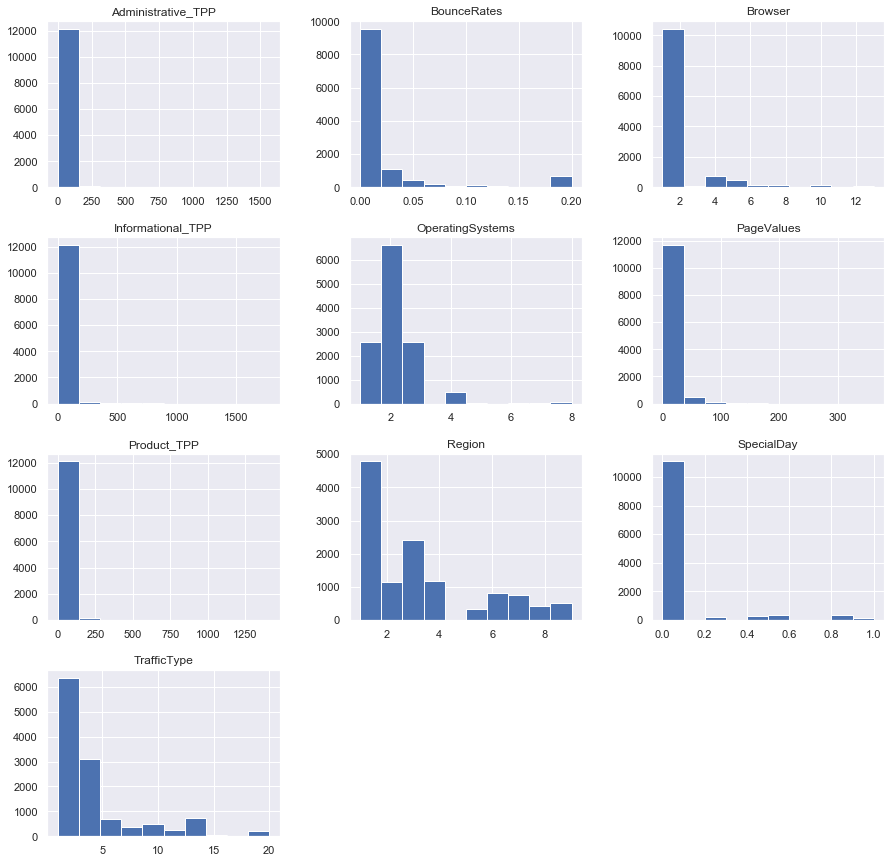

In [11]:
# Check for the variable distributions
shoppers_cleaned.iloc[:,:-2].hist(figsize=(15,15));

Most of the columns have outliers. Let's identify them better using the boxplot

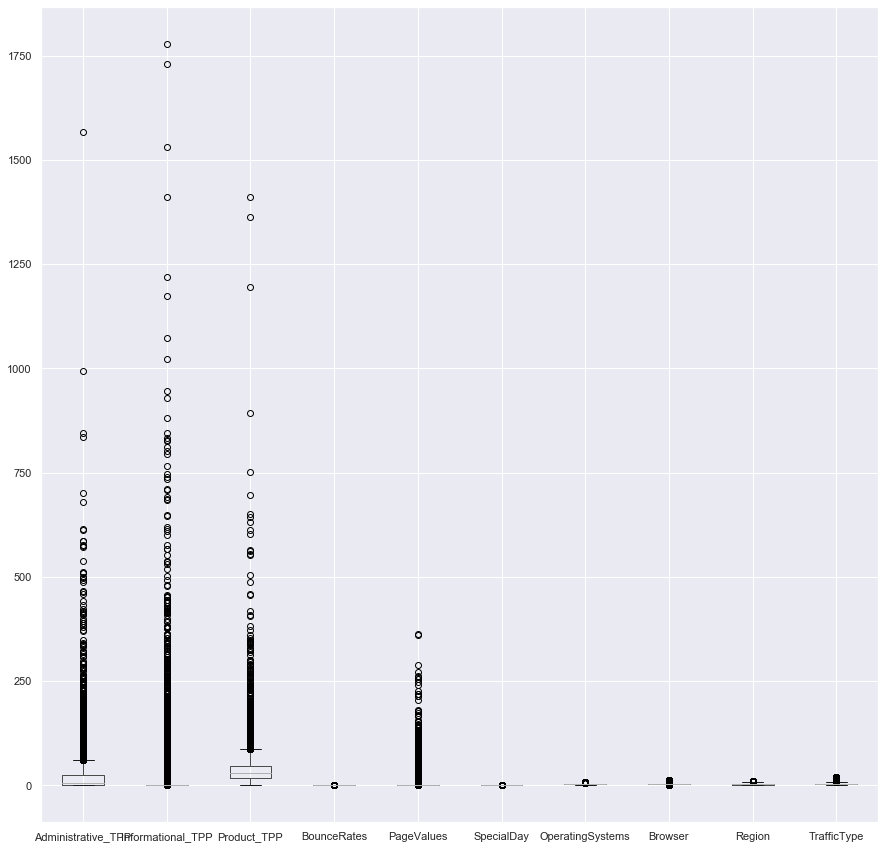

In [12]:
shoppers_cleaned.iloc[:,:-2].boxplot(figsize=(15,15));

In [13]:
shoppers_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_TPP,12330.0,20.196284,45.995573,0.0,0.0000,5.095000,24.360000,1566.600000
Informational_TPP,12330.0,14.807766,65.551321,0.0,0.0000,0.000000,0.000000,1778.000000
Product_TPP,12330.0,37.633679,44.767895,0.0,17.6125,28.880000,45.085000,1411.000000
BounceRates,12330.0,0.022191,0.048488,0.0,0.0000,0.003112,0.016813,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.0000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.0000,0.000000,0.000000,1.000000
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.0000,2.000000,3.000000,8.000000
Browser,12330.0,2.357097,1.717277,1.0,2.0000,2.000000,2.000000,13.000000
Region,12330.0,3.147364,2.401591,1.0,1.0000,3.000000,4.000000,9.000000
TrafficType,12330.0,4.069586,4.025169,1.0,2.0000,2.000000,4.000000,20.000000


In [39]:
shoppers[shoppers.PageValues > 100]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
198,0,0.000000,0,0.000000,17,840.233333,0.000000,0.001667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,False,True
200,1,32.000000,0,0.000000,50,2867.000000,0.000000,0.004000,153.443248,0.0,Mar,2,2,7,8,Returning_Visitor,True,True
1050,1,21.000000,1,61.000000,49,1647.152381,0.000000,0.000800,144.393489,0.0,Mar,2,2,7,2,Returning_Visitor,True,True
1491,5,172.200000,0,0.000000,23,792.722222,0.000000,0.010714,261.491286,0.0,Mar,2,2,1,8,New_Visitor,False,True
2024,0,0.000000,0,0.000000,68,809.245635,0.002985,0.005970,109.912405,0.0,Mar,2,5,4,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,0,0.000000,0,0.000000,7,432.000000,0.000000,0.014286,270.784693,0.0,Nov,2,4,1,8,New_Visitor,False,True
11858,1,42.500000,1,12.833333,104,4054.755952,0.003883,0.010097,141.459054,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12108,0,0.000000,0,0.000000,28,1107.922619,0.014815,0.009877,226.677702,0.0,Dec,8,13,9,20,Other,False,True
12117,1,46.500000,0,0.000000,14,398.979167,0.000000,0.014286,116.337865,0.0,Dec,8,13,9,20,Other,False,True


For the numerical columns we will use the Robust Scaler, since we have outliers in all of them

## Feature Scaling

In [17]:
from sklearn.preprocessing import RobustScaler

shoppers_scaled = shoppers_cleaned.copy()

robust = RobustScaler()
columns = ['Administrative_TPP','Informational_TPP','Product_TPP','PageValues']
robust = robust.fit_transform(shoppers_scaled[columns].values)
shoppers_scaled[columns] = pd.DataFrame(data=robust)

C:\Users\Tiago McDonald\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


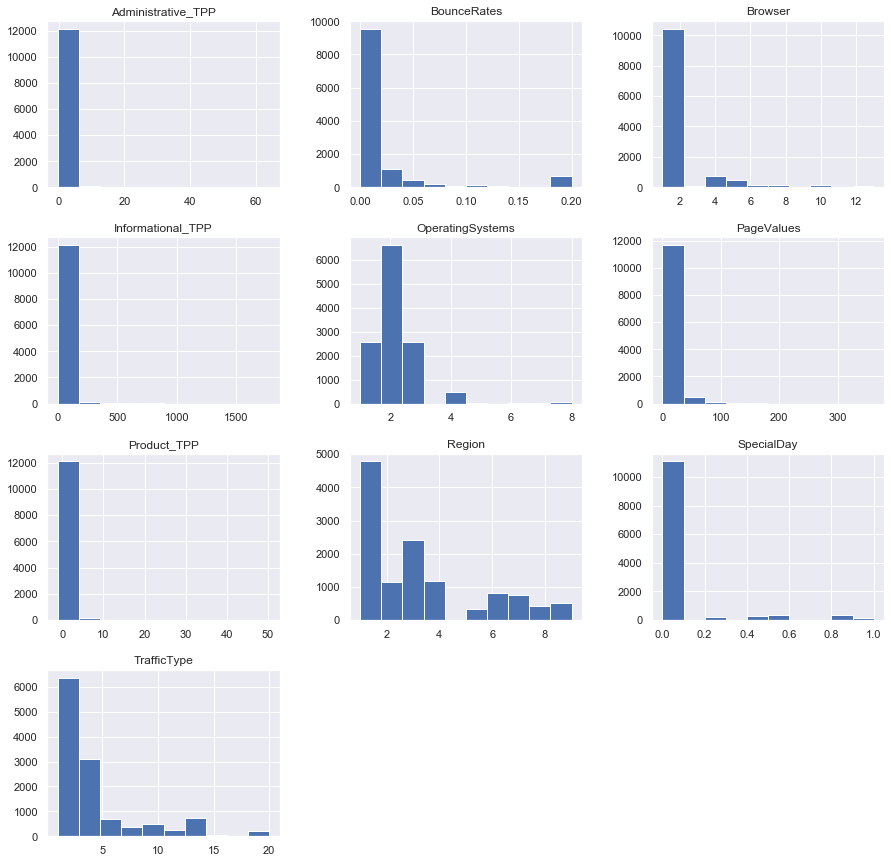

In [18]:
fig, ax = plt.subplots(figsize=(15,15))

shoppers_scaled.iloc[:,:-2].hist(ax=ax)
plt.show()
fig.savefig('Hist_standardized.png');

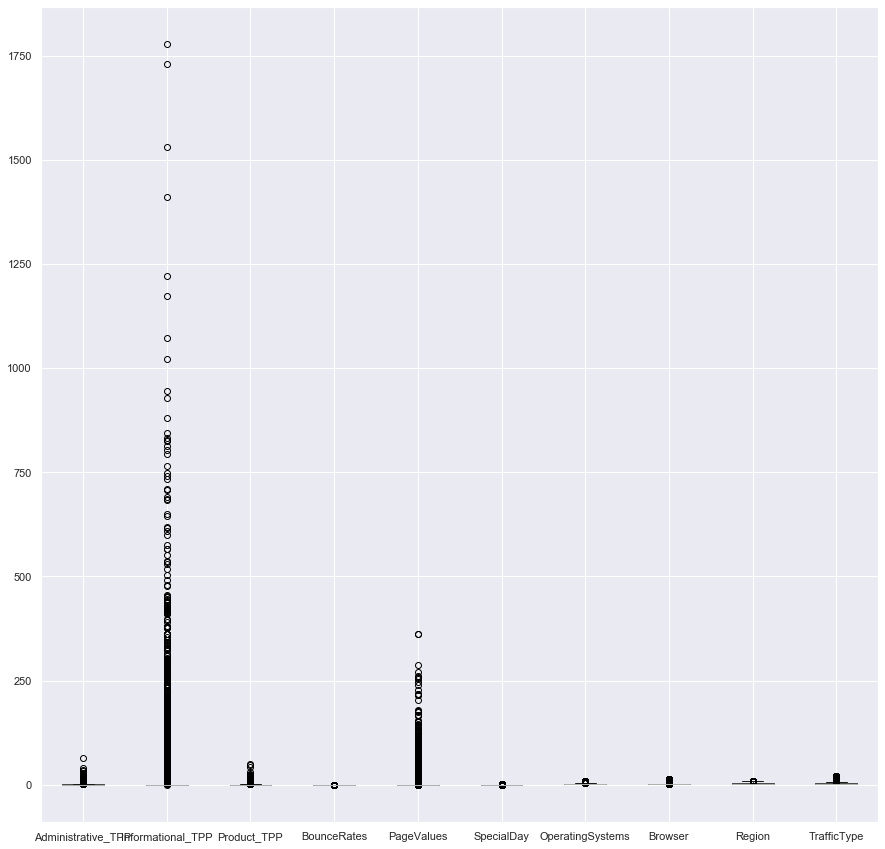

In [19]:
shoppers_scaled.iloc[:,:-2].boxplot(figsize=(15,15));

In [32]:
# 2nd try: Box-Cox
from scipy import stats
shoppers_boxcox = shoppers_cleaned.copy()

shoppers_boxcox['Informational_TPP'] = stats.boxcox(shoppers_boxcox.Informational_TPP.values+1)[0]
shoppers_boxcox['Administrative_TPP'] = stats.boxcox(shoppers_boxcox.Administrative_TPP.values+1)[0]
shoppers_boxcox['Product_TPP'] = stats.boxcox(shoppers_boxcox.Product_TPP.values+1)[0]
shoppers_boxcox['PageValues'] = stats.boxcox(shoppers_boxcox.PageValues.values+1)[0]

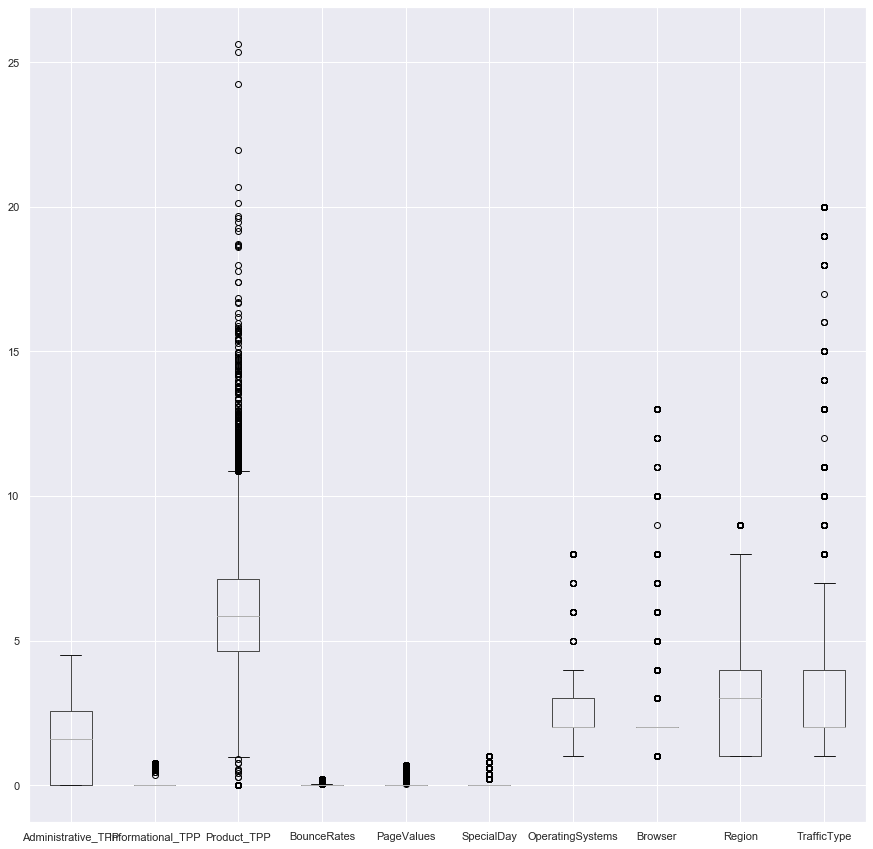

In [34]:
shoppers_boxcox.iloc[:,:-2].boxplot(figsize=(15,15));

C:\Users\Tiago McDonald\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


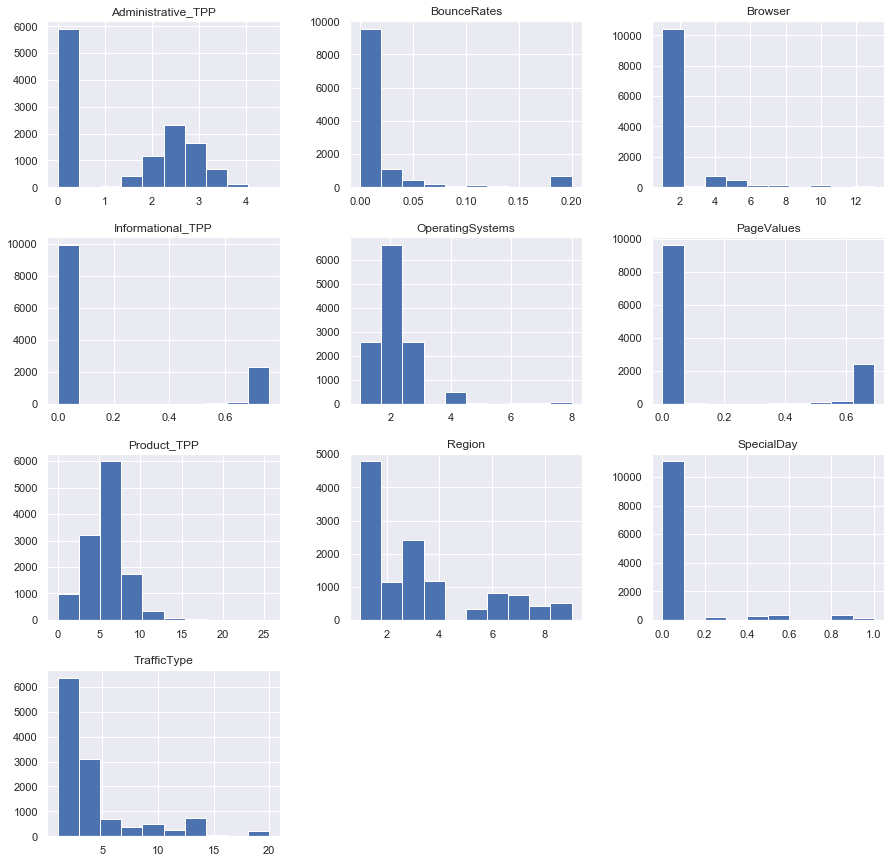

In [35]:
fig, ax = plt.subplots(figsize=(15,15))

shoppers_boxcox.iloc[:,:-2].hist(ax=ax)
plt.show()

The Box-Cox method work better than the feature scaling, so we'll keep these values despite still having outliers

## Categorical columns

In [52]:
shoppers_cleaned = shoppers_boxcox

shoppers_cleaned.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [53]:
shoppers_cleaned.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Might be better to aggregate the Operating Systems with less than 500 values

In [54]:
shoppers_cleaned.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [55]:
top8 = shoppers_cleaned.Browser.value_counts().index[:8]
shoppers_cleaned.Browser = np.where(shoppers_cleaned.Browser.isin(top8)
                                          , shoppers_cleaned.Browser
                                          , 'OTHER'
                                         )

In [56]:
shoppers_cleaned.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [57]:
top10 = shoppers_cleaned.TrafficType.value_counts().index[:10]
shoppers_cleaned.TrafficType = np.where(shoppers_cleaned.TrafficType.isin(top10)
                                          , shoppers_cleaned.TrafficType
                                          , 'OTHER'
                                         )

In [58]:
shoppers_cleaned.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [59]:
dummies = ['Region','Browser','TrafficType','VisitorType','Month','OperatingSystems']
shoppers_dummies = pd.get_dummies(shoppers_boxcox, columns = dummies, drop_first=True)

In [60]:
shoppers_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative_TPP             12330 non-null  float64
 1   Informational_TPP              12330 non-null  float64
 2   Product_TPP                    12330 non-null  float64
 3   BounceRates                    12330 non-null  float64
 4   PageValues                     12330 non-null  float64
 5   SpecialDay                     12330 non-null  float64
 6   Weekend                        12330 non-null  bool   
 7   Revenue                        12330 non-null  bool   
 8   Region_2                       12330 non-null  uint8  
 9   Region_3                       12330 non-null  uint8  
 10  Region_4                       12330 non-null  uint8  
 11  Region_5                       12330 non-null  uint8  
 12  Region_6                       12330 non-null 

# Feature Selection